<a href="https://colab.research.google.com/github/8Chatea8/HeadChecker/blob/main/data/whole_processed_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumBarunGothic'

In [ ]:
df_so = pd.read_csv("/content/drive/MyDrive/Aiffel-MahiMahi/data_processed/data_SO_1.csv")
df_po = pd.read_csv("/content/drive/MyDrive/Aiffel-MahiMahi/data_processed/data_PO_1.csv")
df_et = pd.read_csv("/content/drive/MyDrive/Aiffel-MahiMahi/data_processed/data_ET_1.csv")
df_lc = pd.read_csv("/content/drive/MyDrive/Aiffel-MahiMahi/data_processed/data_LC_1.csv")
df_is = pd.read_csv("/content/drive/MyDrive/Aiffel-MahiMahi/data_processed/data_IS_1.csv")
df_gb = pd.read_csv("/content/drive/MyDrive/Aiffel-MahiMahi/data_processed/data_GB_1.csv")
df_ec = pd.read_csv("/content/drive/MyDrive/Aiffel-MahiMahi/data_processed/data_EC_1.csv")

SO - 사회  
PO - 정치  
LC - 생활&문화  
IS - IT&과학  
GB - 세계  
ET - 연예  
EC - 경제

In [ ]:
metadata = pd.DataFrame({'data': [df_so, df_po, df_et, df_lc, df_is, df_gb, df_ec],
                         'category': ['사회', '정치', '생활&문화', 'IT&과학', '세계', '연예', '경제']})

metadata


,data,category
0,...,사회
1,H...,정치
2,Headlin...,생활&문화
3,Headline \ 0 ...,IT&과학
4,Headl...,세계
5,Headline \ 0...,연예
6,Headline...,경제


In [ ]:
metadata['Count'] = metadata['data'].apply(lambda x: len(x))
entire_count = metadata['Count'].sum()

for i in range(len(metadata)):
    print(f"{metadata.loc[i, 'category']} 기사의 개수: {metadata.loc[i, 'Count']}")
print('-'*45)
print(f'총 기사의 개수: {entire_count}')

사회 기사의 개수: 68288
정치 기사의 개수: 21155
생활&문화 기사의 개수: 62051
IT&과학 기사의 개수: 16061
세계 기사의 개수: 35666
연예 기사의 개수: 57516
경제 기사의 개수: 57395
---------------------------------------------
총 기사의 개수: 318132


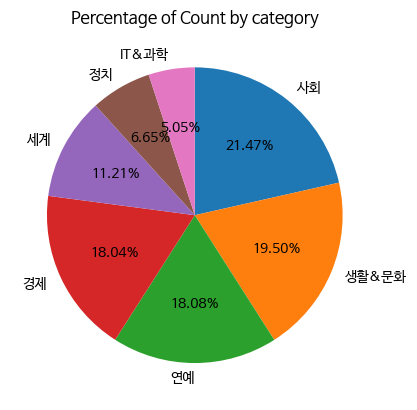

In [ ]:
labels_frequency = zip(metadata['category'], metadata['Count'])
labels_frequency = sorted(labels_frequency,key=lambda x: x[1],reverse=True)

sorted_labels = [x[0] for x in labels_frequency]
sorted_counts = [x[1] for x in labels_frequency]

plt.pie(sorted_counts, labels=sorted_labels, autopct='%.2f%%', counterclock=False, startangle=90)
plt.title("Percentage of Count by category")
plt.show()

In [ ]:
metadata['CountOfClass0'] = metadata['data'].apply(lambda x: (x['Class']==0).sum())
metadata['CountOfClass1'] = metadata['data'].apply(lambda x: (x['Class']==1).sum())

metadata

,data,category,Count,CountOfClass0,CountOfClass1
0,...,사회,68288,30041,38247
1,H...,정치,21155,10533,10622
2,Headlin...,생활&문화,62051,31267,30784
3,Headline \ 0 ...,IT&과학,16061,8816,7245
4,Headl...,세계,35666,14225,21441
5,Headline \ 0...,연예,57516,32652,24864
6,Headline...,경제,57395,28130,29265


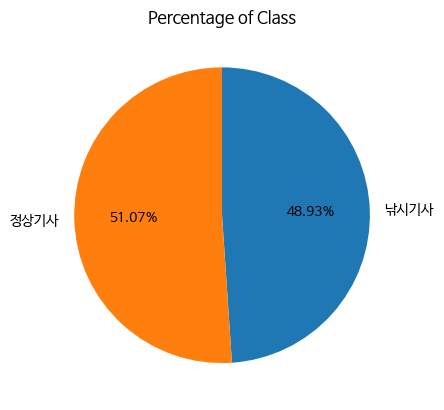

In [ ]:
count_of_0 = metadata['CountOfClass0'].sum()
count_of_1 = metadata['CountOfClass1'].sum()

plt.pie([count_of_0, count_of_1], labels=['낚시기사', '정상기사'], autopct='%.2f%%', counterclock=False, startangle=90)
plt.title('Percentage of Class')
plt.show()

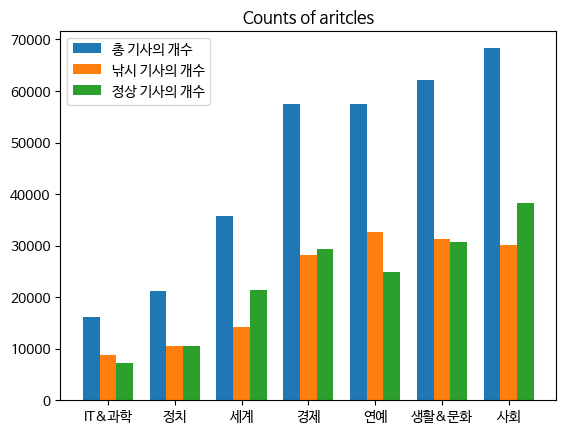

In [ ]:
x = np.arange(len(metadata))
width = 0.25
multiplier = 0

labels_counts = zip(metadata['category'], metadata['Count'], metadata['CountOfClass0'], metadata['CountOfClass1'])
labels_counts =  sorted(labels_counts,key=lambda x: x[1],reverse=False)

sorted_label = [labels_counts[i][0] for i in range(len(labels_counts))]

counts_dict_key = ['총 기사의 개수', '낚시 기사의 개수', '정상 기사의 개수']
counts_dict_value_whole = [labels_counts[i][1] for i in range(len(labels_counts))]
counts_dict_value_0 = [labels_counts[i][2] for i in range(len(labels_counts))]
counts_dict_value_1 = [labels_counts[i][3] for i in range(len(labels_counts))]
counts_dict_value = [counts_dict_value_whole, counts_dict_value_0, counts_dict_value_1]

counts_dict = {k:v for k, v in zip(counts_dict_key, counts_dict_value)}

for category, counts in counts_dict.items():
    offset = width * multiplier
    rects = plt.bar(x+offset, counts, width, label=category)
    multiplier +=1

plt.title('Counts of aritcles')
plt.xticks(x+width, sorted_label)
plt.legend()
plt.show()

BERT의 입력 문장 길이 한계로 너무 긴 기사들은 제외했습니다.  
그 과정에서 IT & 과학 분야, 정치 분야, 세계 분야의 기사들이 많이 삭제되었습니다.

In [ ]:
data = pd.concat([df_so, df_po, df_et, df_lc, df_is, df_gb, df_ec],axis=0)
data.head()

,Headline,Content,Class,HeadlineLen,ContentLen,countOfsentences
0,광주지역 소상공인의 외침... 코로나 직격탄 맞은 소상공인 도울 방법은?,신종 코로나바이러스 감염증 직격탄을 맞은 소상공인들이 저마다 절박한 심정으로 지원을...,0,40,702,10
1,"“과일 껍질 세척 후 드세요”…경기보건환경硏, 과일 껍질 잔류농약 검출률 과육의 10배",경기도보건환경연구원은 지난해 1월부터 8월까지 온라인 및 도내 대형마트에서 유통된 ...,1,48,570,7
2,늙은 부모님 악몽 꾼다면…이 병 걸릴 확률 높다,노년에 악몽을 자주 꾸는 것은 파킨슨병을 예고하는 경고 신호일 수 있다는 연구 결과...,1,26,733,12
3,13세 친딸 몸쓸짓하고 “친구 소개해줘… 40대父 징역 12년,13세 친딸을 수차례 성폭행하고 학대한 혐의로 재판에 넘겨진 40대 남성에게 법원이...,1,34,605,8
4,"경과원, 인공지능?가상현실 기술 성과공유회 개최",경기도경제과학진흥원은 16일부터 이틀간 경기창조경제혁신센터 국제회의장에서‘2021 ...,1,26,665,6


In [ ]:
len(data)

318131

In [ ]:
data.to_csv('data_whole.csv', index=False, encoding='utf-8')

In [ ]:
# for df in metadata['data']:
#     df['HeadlineLen'] = df['Headline'].apply(lambda x: len(x))
df_list = [df_so, df_po, df_et, df_lc, df_is, df_gb, df_ec]
for df in df_list:
    print(len(df.columns))

5
5
5
4
3
3
3


헤드라인 길이를기록하는 코드가 에러가 나서 살펴보니 df_lc에서 결측값이 존재했습니다.
결측값이 존재하는 행을 확인하고 지우는 작업을 진행했습니다.

In [ ]:
df_lc['Headline'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16061 entries, 0 to 16060
Series name: Headline
Non-Null Count  Dtype 
--------------  ----- 
16060 non-null  object
dtypes: object(1)
memory usage: 125.6+ KB


In [ ]:
for value in df_lc['Headline']:
    if type(value) == float:
        print(value)

nan


In [ ]:
nan_index = df_lc.index[df_lc['Headline'].isnull()]
print(nan_index)

Int64Index([12499], dtype='int64')


In [ ]:
df_lc.loc[12499, :]

Headline                                                     NaN
Content        중앙일보와 교보문고가 학과 공부에 치우치고 있는 청소년들에게 교양을 높이는 데 도움...
Class                                                          1
HeadlineLen                                                   32
Name: 12499, dtype: object

In [ ]:
df_lc = df_lc.dropna()

df_lc.shape

(16060, 4)

In [ ]:
df_lc['Headline'].isnull().sum()

0

In [ ]:
for df in  df_list:
    df['HeadlineLen'] = df['Headline'].apply(lambda x: len(x))
    df['ContentLen'] = df['Content'].apply(lambda x: len(x))

for df in  df_list:
    print(len(df.columns))

5
5
5
5
5
5
5


In [ ]:
def count_of_sentences(sentences):
    sentences_list = sentences.split('\n')
    return len(sentences_list)

In [ ]:
for df in df_list:
    df['countOfsentences'] = df['Content'].apply(lambda x: count_of_sentences(x))

for df in df_list:
    print(len(df.columns))

6
6
6
6
6
6
6


In [ ]:
data = pd.concat([df_so, df_po, df_et, df_lc, df_is, df_gb, df_ec],axis=0)
data.head()

,Headline,Content,Class,HeadlineLen,ContentLen,countOfsentences
0,광주지역 소상공인의 외침... 코로나 직격탄 맞은 소상공인 도울 방법은?,신종 코로나바이러스 감염증 직격탄을 맞은 소상공인들이 저마다 절박한 심정으로 지원을...,0,40,702,10
1,"“과일 껍질 세척 후 드세요”…경기보건환경硏, 과일 껍질 잔류농약 검출률 과육의 10배",경기도보건환경연구원은 지난해 1월부터 8월까지 온라인 및 도내 대형마트에서 유통된 ...,1,48,570,7
2,늙은 부모님 악몽 꾼다면…이 병 걸릴 확률 높다,노년에 악몽을 자주 꾸는 것은 파킨슨병을 예고하는 경고 신호일 수 있다는 연구 결과...,1,26,733,12
3,13세 친딸 몸쓸짓하고 “친구 소개해줘… 40대父 징역 12년,13세 친딸을 수차례 성폭행하고 학대한 혐의로 재판에 넘겨진 40대 남성에게 법원이...,1,34,605,8
4,"경과원, 인공지능?가상현실 기술 성과공유회 개최",경기도경제과학진흥원은 16일부터 이틀간 경기창조경제혁신센터 국제회의장에서‘2021 ...,1,26,665,6


In [ ]:
len(data)

318131

In [ ]:
data.to_csv('data_whole_with_len.csv', index=False, encoding='utf-8')

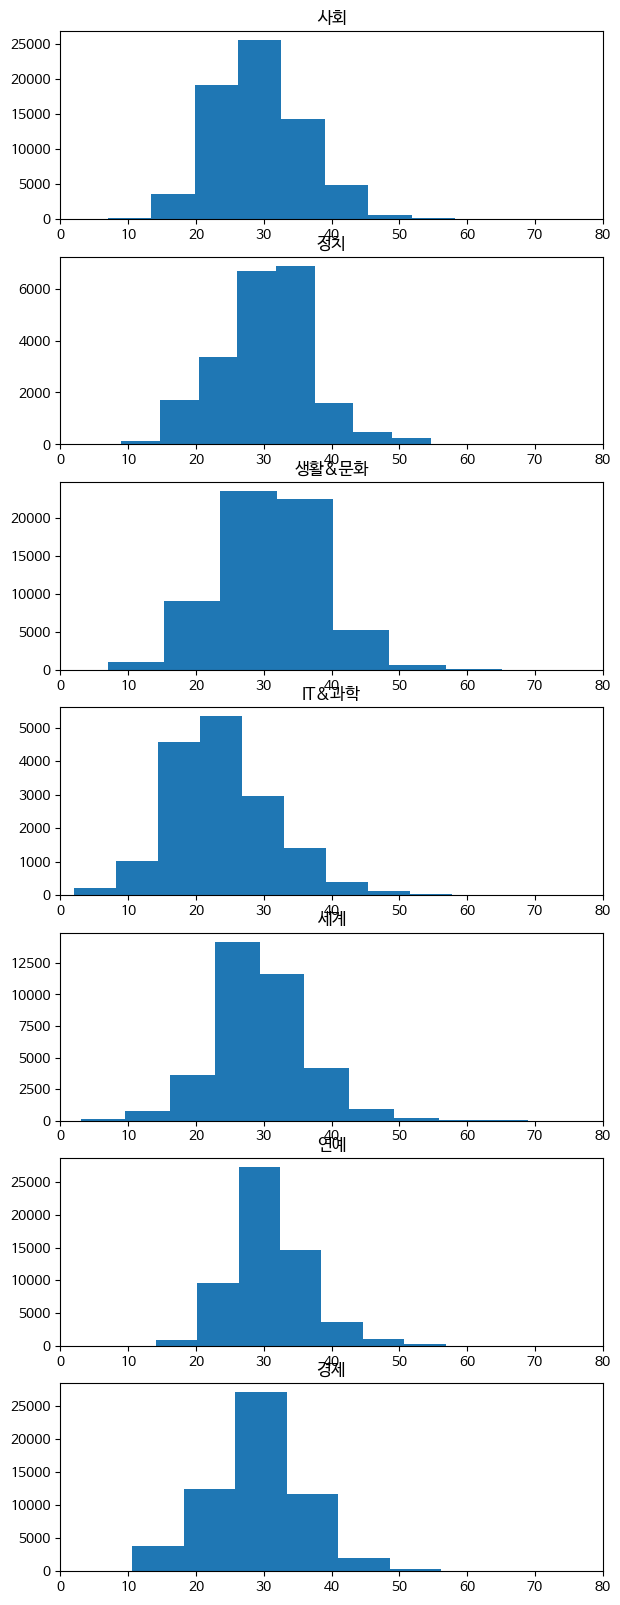

In [ ]:
plt.figure(figsize=(7, 20))
i = 1

for i in range(len(df_list)):
    df = df_list[i]
    plt.subplot(7, 1, i+1)
    plt.hist(df['HeadlineLen'])
    plt.xlim([0, 80])
    plt.title(metadata.loc[i, 'category'])

    # plt.subplot(7, 2, i+2)
    # plt.hist(df['Content'])
    # # plt.title(metadata.loc[i, 'category'])

plt.show()

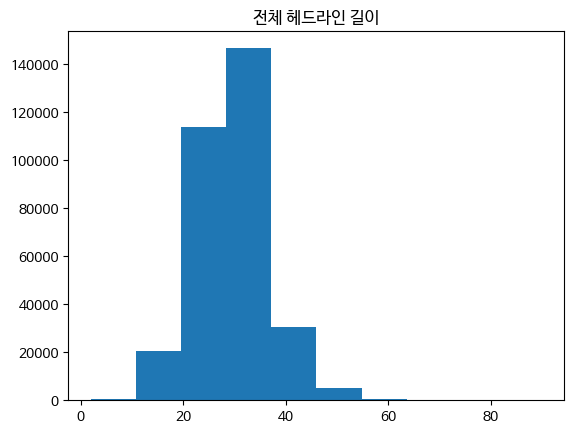

In [ ]:
plt.hist(data['HeadlineLen'])
plt.title('전체 헤드라인 길이')
plt.show()

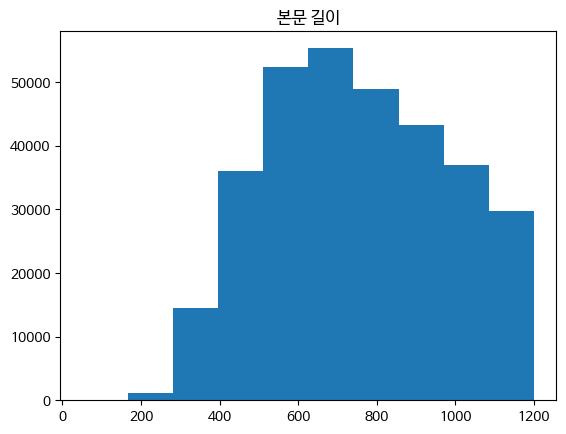

In [ ]:
plt.hist(data['ContentLen'])
plt.title('본문 길이')
plt.show()

본문의 길이가 너무 긴 데이터는 BERT모델 특성상 학습에 어려움이 있다고 판단하여 삭제했습니다.  
본문의 최대 길이는 1200으로 설정되었습니다.

<function matplotlib.pyplot.show(close=None, block=None)>

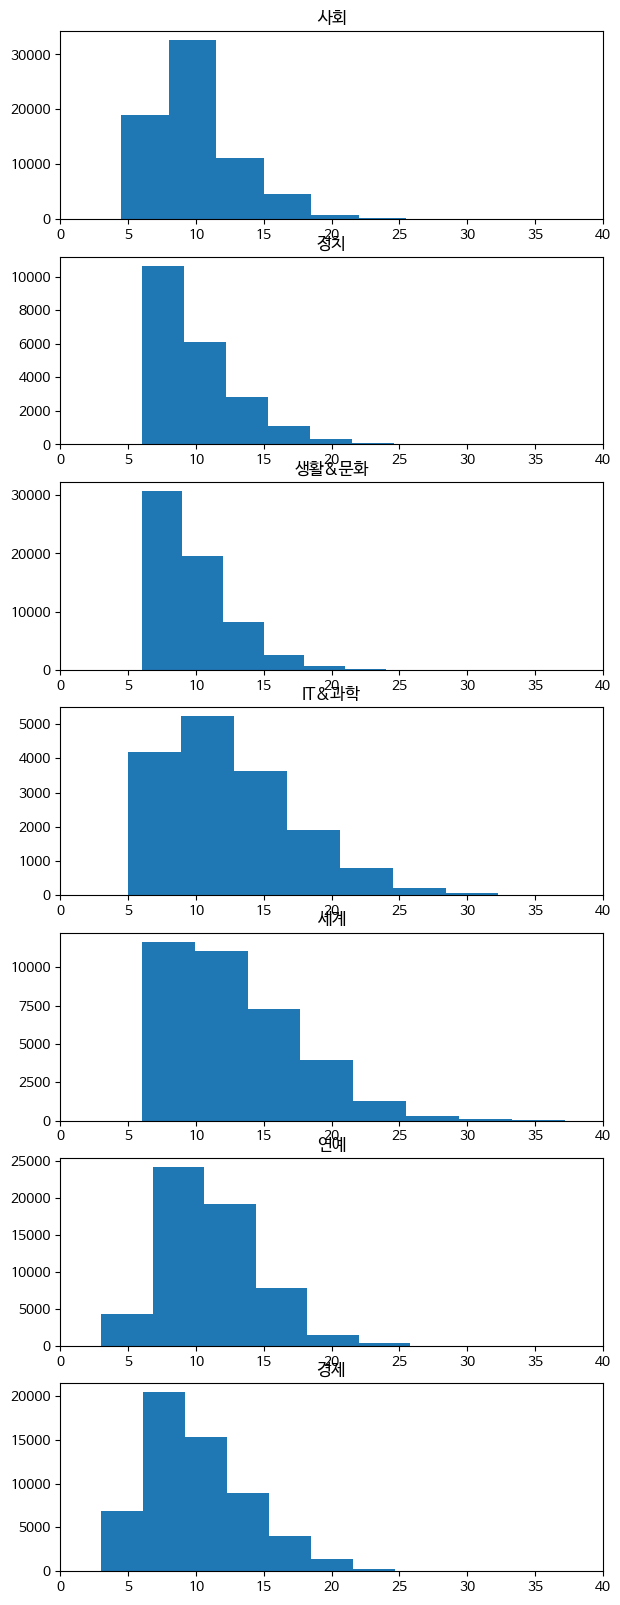

In [ ]:
plt.figure(figsize=(7, 20))
i = 1

for i in range(len(df_list)):
    df = df_list[i]
    plt.subplot(7, 1, i+1)
    plt.hist(df['countOfsentences'])
    plt.xlim([0, 40])
    plt.title(metadata.loc[i, 'category'])
plt.show

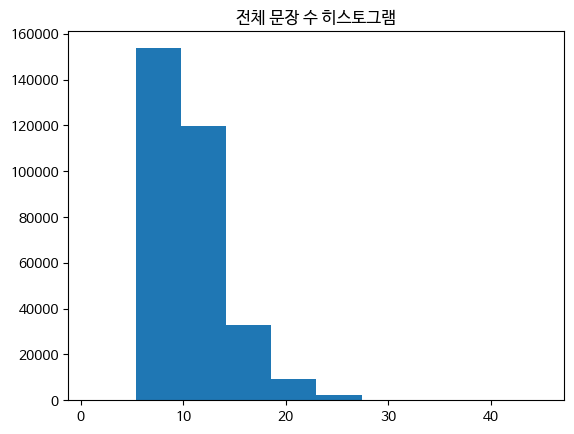

In [ ]:
plt.hist(data['countOfsentences'])
plt.title('전체 문장 수 히스토그램')
plt.show()

BERT의 최대 입력 길이가 512토큰임을 고려했을 때, 본문 전체를 활용하기 위해서는 본문을 적절한 단위로 나눠주어야할 필요성이 있습니다.  
너무 긴 문장은 제외하고, 1200자 이내의 기사에 대해서 문장단위로 몇 문장씩 나누어야지 효과적인지 확인하기 위해서 문장 개수를 출력했습니다.  
총 10문장 내외가 가장 많은 수를 차지하고, 대체로 30문장 이내에 존재하는 것을 고려할 때, 10문장 단위로 나누어서 학습하는 것이 적절하다고 판단했습니다.

In [ ]:
df_so = pd.read_csv("/content/drive/MyDrive/Aiffel-MahiMahi/data_processed/data_SO_all.csv")
df_po = pd.read_csv("/content/drive/MyDrive/Aiffel-MahiMahi/data_processed/data_PO_all.csv")
df_et = pd.read_csv("/content/drive/MyDrive/Aiffel-MahiMahi/data_processed/data_ET_all.csv")
df_lc = pd.read_csv("/content/drive/MyDrive/Aiffel-MahiMahi/data_processed/data_LC_all.csv")
df_is = pd.read_csv("/content/drive/MyDrive/Aiffel-MahiMahi/data_processed/data_IS_all.csv")
df_gb = pd.read_csv("/content/drive/MyDrive/Aiffel-MahiMahi/data_processed/data_GB_all.csv")
df_ec = pd.read_csv("/content/drive/MyDrive/Aiffel-MahiMahi/data_processed/data_EC_all.csv")

In [ ]:
df_all = pd.concat([df_so, df_po, df_et, df_lc, df_is, df_gb, df_ec],axis=0)
df_all.shape

(586724, 3)

In [ ]:
VL_df = pd.read_csv("/content/drive/MyDrive/Aiffel-MahiMahi/data_processed/VL_data.csv", encoding='utf-8')

VL_df.shape

(73321, 3)

In [ ]:
df_all.to_csv('data_whole_all.csv', encoding='utf-8')